In [17]:
import pandas as pd

from matplotlib import pyplot as plt
from sklearn.metrics import auc

### Read saved results

In [18]:
cnn = pd.read_csv("CNN_result.csv")
lstm = pd.read_csv("LSTM_result.csv")
bi = pd.read_csv("BiLSTM_result.csv")
cl = pd.read_csv("CNN-LSTM_result.csv")
cbi = pd.read_csv("CNN-BiLSTM_result.csv")

### Comparison

Accuracy

In [19]:
cnn_score = cnn['accuracy'][0]
lstm_score = lstm['accuracy'][0]
bi_score = bi['accuracy'][0]
cl_score = cl['accuracy'][0]
cbi_score = cbi['accuracy'][0]

model = ['CNN', 'LSTM', "BiLSTM", "CNN-LSTM", "CNN-BiLSTM"]
acc = [round(cnn_score, 4), round(lstm_score, 4), round(bi_score, 4), round(cl_score, 4), round(cbi_score, 4)]

acc_dict = {"Model":model, "Accuracy":acc}
df_acc = pd.DataFrame(acc_dict)

df_acc

,Model,Accuracy
0,CNN,0.6577
1,LSTM,0.6552
2,BiLSTM,0.6587
3,CNN-LSTM,0.6596
4,CNN-BiLSTM,0.6609


loss-epoch curve

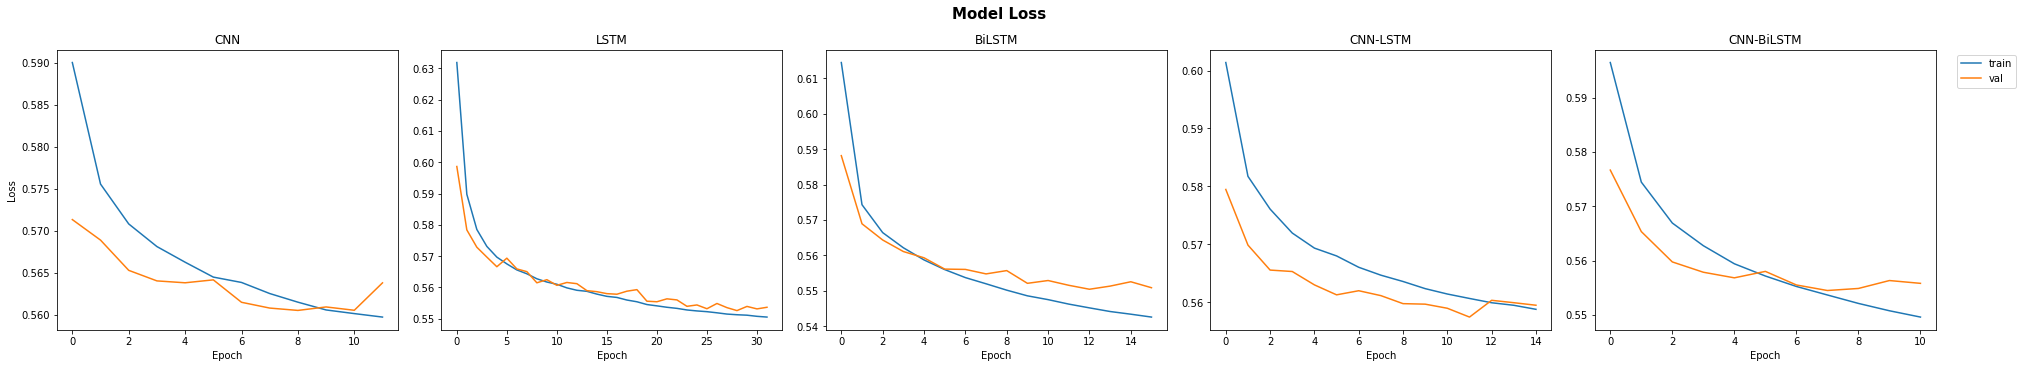

In [20]:
fig, axs = plt.subplots(1, 5, figsize=(28,5), constrained_layout=True)

fig.suptitle('Model Loss     ', fontsize=15, fontweight='bold')

axs[0].plot(cnn['loss'])
axs[0].plot(cnn['val_loss'])
axs[0].set(ylabel='Loss')
axs[0].set_title('CNN')

axs[1].plot(lstm['loss'])
axs[1].plot(lstm['val_loss'])
axs[1].set_title('LSTM')

axs[2].plot(bi['loss'])
axs[2].plot(bi['val_loss'])
axs[2].set_title('BiLSTM')

axs[3].plot(cl['loss'])
axs[3].plot(cl['val_loss'])
axs[3].set_title('CNN-LSTM')

axs[4].plot(cbi['loss'])
axs[4].plot(cbi['val_loss'])
axs[4].set_title('CNN-BiLSTM')

for ax in axs.flat:
    ax.set(xlabel='Epoch')

plt.legend(['train', 'val'], loc='upper right', bbox_to_anchor=(1.25, 1.0))
plt.show()

precision-recall curve

In [21]:
cnn_prauc = cnn['pr_auc'][0]
lstm_prauc = lstm['pr_auc'][0]
bi_prauc = bi['pr_auc'][0]
cl_prauc = cl['pr_auc'][0]
cbi_prauc = cbi['pr_auc'][0]

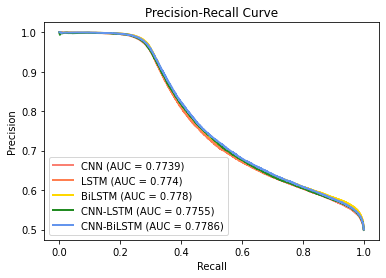

In [22]:
plt.plot(cnn['recall'], cnn['precision'], color='salmon', linewidth=2)
plt.plot(lstm['recall'], lstm['precision'], color='coral', linewidth=2)
plt.plot(bi['recall'], bi['precision'], color='gold', linewidth=2)
plt.plot(cl['recall'], cl['precision'], color='forestgreen', linewidth=2)
plt.plot(cbi['recall'], cbi['precision'], color='cornflowerblue', linewidth=2)

plt.title('Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')

plt.legend(['CNN (AUC = ' + str(round(cnn_prauc,4)) + ')', 'LSTM (AUC = ' + str(round(lstm_prauc,4)) + ')',
            'BiLSTM (AUC = ' + str(round(bi_prauc,4)) + ')', 'CNN-LSTM (AUC = ' + str(round(cl_prauc,4)) + ')',
            'CNN-BiLSTM (AUC = ' + str(round(cbi_prauc,4)) + ')'], loc='lower left')

plt.show()

ROC Curve, AUC

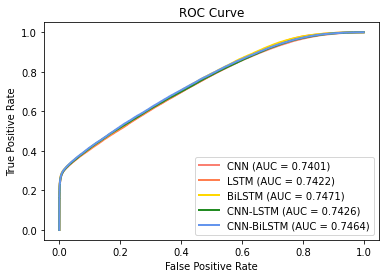

In [23]:
plt.plot(cnn['fpr'], cnn['tpr'], color='salmon', linewidth=2)
plt.plot(lstm['fpr'], lstm['tpr'], color='coral', linewidth=2)
plt.plot(bi['fpr'], bi['tpr'], color='gold', linewidth=2)
plt.plot(cl['fpr'], cl['tpr'], color='forestgreen', linewidth=2)
plt.plot(cbi['fpr'], cbi['tpr'], color='cornflowerblue', linewidth=2)

plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.legend(['CNN (AUC = ' + str(round(cnn['auc'][0],4)) + ')', 'LSTM (AUC = ' + str(round(lstm['auc'][0],4)) + ')',
            'BiLSTM (AUC = ' + str(round(bi['auc'][0],4)) + ')', 'CNN-LSTM (AUC = ' + str(round(cl['auc'][0],4)) + ')',
            'CNN-BiLSTM (AUC = ' + str(round(cbi['auc'][0],4)) + ')'], loc='lower right')

plt.show()

In [24]:
'''
fig, axs = plt.subplots(1, 5, figsize=(30,6), constrained_layout=True)

fig.suptitle('ROC Curve   ', fontsize=15, fontweight='bold')
ax.plot(range(10))

axs[0].plot(cnn['fpr'], cnn['tpr'], color='salmon', linewidth=2)
axs[0].legend(['CNN (AUC = ' + str(round(cnn['auc'][0],4)) + ')'], loc='lower right')
axs[0].set(ylabel='True Positive Rate')
axs[0].set_title('CNN')

axs[1].plot(lstm['fpr'], lstm['tpr'], color='coral', linewidth=2)
axs[1].legend(['LSTM (AUC = ' + str(round(lstm['auc'][0],4)) + ')'], loc='lower right')
axs[1].set_title('LSTM')

axs[2].plot(bi['fpr'], bi['tpr'], color='gold', linewidth=2)
axs[2].legend(['BiLSTM (AUC = ' + str(round(bi['auc'][0],4)) + ')'], loc='lower right')
axs[2].set_title('BiLSTM')

axs[3].plot(cl['fpr'], cl['tpr'], color='forestgreen', linewidth=2)
axs[3].legend(['CNN-LSTM (AUC = ' + str(round(cl['auc'][0],4)) + ')'], loc='lower right')
axs[3].set_title('CNN-LSTM')

axs[4].plot(cbi['fpr'], cbi['tpr'], color='cornflowerblue', linewidth=2)
axs[4].legend(['CNN-BiLSTM (AUC = ' + str(round(cbi['auc'][0],4)) + ')'], loc='lower right')
axs[4].set_title('CNN-BiLSTM')

for ax in axs.flat:
    ax.set(xlabel='False Positive Rate')
plt.show()
'''

"\nfig, axs = plt.subplots(1, 5, figsize=(30,6), constrained_layout=True)\n\nfig.suptitle('ROC Curve   ', fontsize=15, fontweight='bold')\nax.plot(range(10))\n\naxs[0].plot(cnn['fpr'], cnn['tpr'], color='salmon', linewidth=2)\naxs[0].legend(['CNN (AUC = ' + str(round(cnn['auc'][0],4)) + ')'], loc='lower right')\naxs[0].set(ylabel='True Positive Rate')\naxs[0].set_title('CNN')\n\naxs[1].plot(lstm['fpr'], lstm['tpr'], color='coral', linewidth=2)\naxs[1].legend(['LSTM (AUC = ' + str(round(lstm['auc'][0],4)) + ')'], loc='lower right')\naxs[1].set_title('LSTM')\n\naxs[2].plot(bi['fpr'], bi['tpr'], color='gold', linewidth=2)\naxs[2].legend(['BiLSTM (AUC = ' + str(round(bi['auc'][0],4)) + ')'], loc='lower right')\naxs[2].set_title('BiLSTM')\n\naxs[3].plot(cl['fpr'], cl['tpr'], color='forestgreen', linewidth=2)\naxs[3].legend(['CNN-LSTM (AUC = ' + str(round(cl['auc'][0],4)) + ')'], loc='lower right')\naxs[3].set_title('CNN-LSTM')\n\naxs[4].plot(cbi['fpr'], cbi['tpr'], color='cornflowerblue', l